<a href="https://colab.research.google.com/github/bertina3107/star_data_analysis/blob/main/Star_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Peek into the data by creating pandas dataframe
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(10) # Random 10 samples from star_df

# Check general information about the dataframe
star_df.info()

"""Observations
**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*

Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*

**2)** Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

**3)** It consists of some different features of stars. Information on the star type is given below,
- **0** → Brown Dwarf
- **1** → Red Dwarf
- **2** → White Dwarf
- **3** → Main Sequence
- **4** → Supergiants
- **5** → Hypergiants
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


'Observations\n**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,\n- *Absolute Temperature (in K)*    \n- *Relative Luminosity (L/Lo)*\n- *Relative Radius (R/Ro)*\n- *Absolute Magnitude (Mv)*\n- *Star Color*\n- *Spectral Class*\n- *Star Type (Target classes)*\n    \nHere,\n- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*\n- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*\n    \n**2)** Two categorical features (object type) which will need some kind of encoding,\n- *Star Color*\n- *Spectral Class*\n\n**3)** It consists of some different features of stars. Information on the star type is given below,       \n- **0** → Brown Dwarf       \n- **1** → Red Dwarf       \n- **2** → White Dwarf      \n- **3** → Main Sequence    \n- **4** → Supergiants      \n- **5** → Hypergiants\n'

In [14]:
# Bar chart to visualize the count of stars with respective type
# Customize the plot
plt.figure(figsize=(4.3,4.3))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'white', 'yellow', 'lightblue', 'orange'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize star count per star type', color='royalblue', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('# of Stars', color='white', fontsize=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
           rotation=45, color='lime')
plt.show()

In [15]:
# Visulaising the Star color data
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            palette='viridis')
ax.bar_label(ax.containers[0], color='red', weight='bold')
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star color',color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.show()


<ipython-input-15-2e89ecd2400d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=star_df['Star color'].value_counts().index,


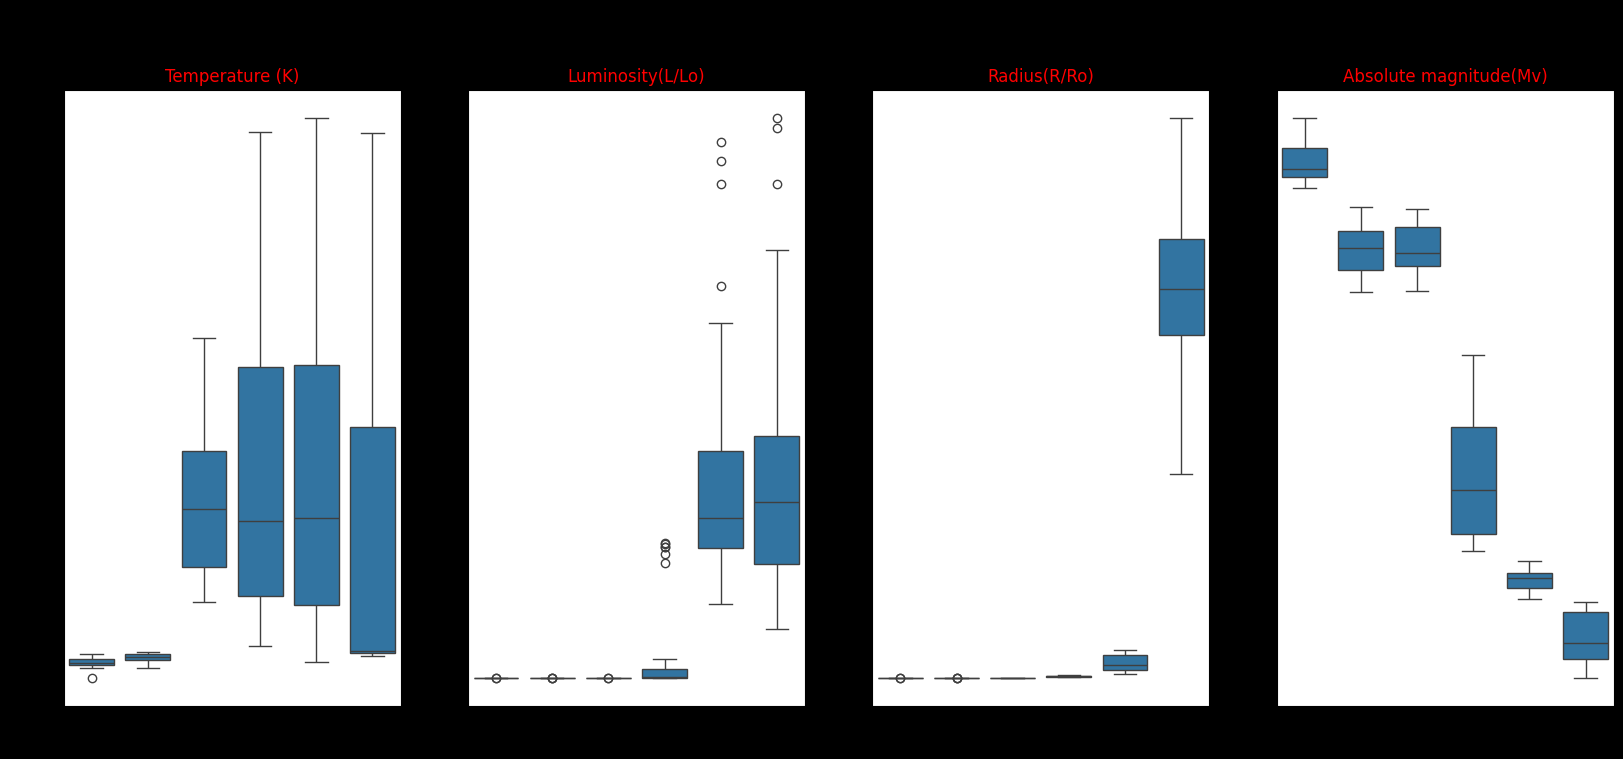

In [16]:
# Visualize Outliers in the Data
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='black', weight='bold', fontsize=15)
# Using for loop to easily repeat some steps to create subplot
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')


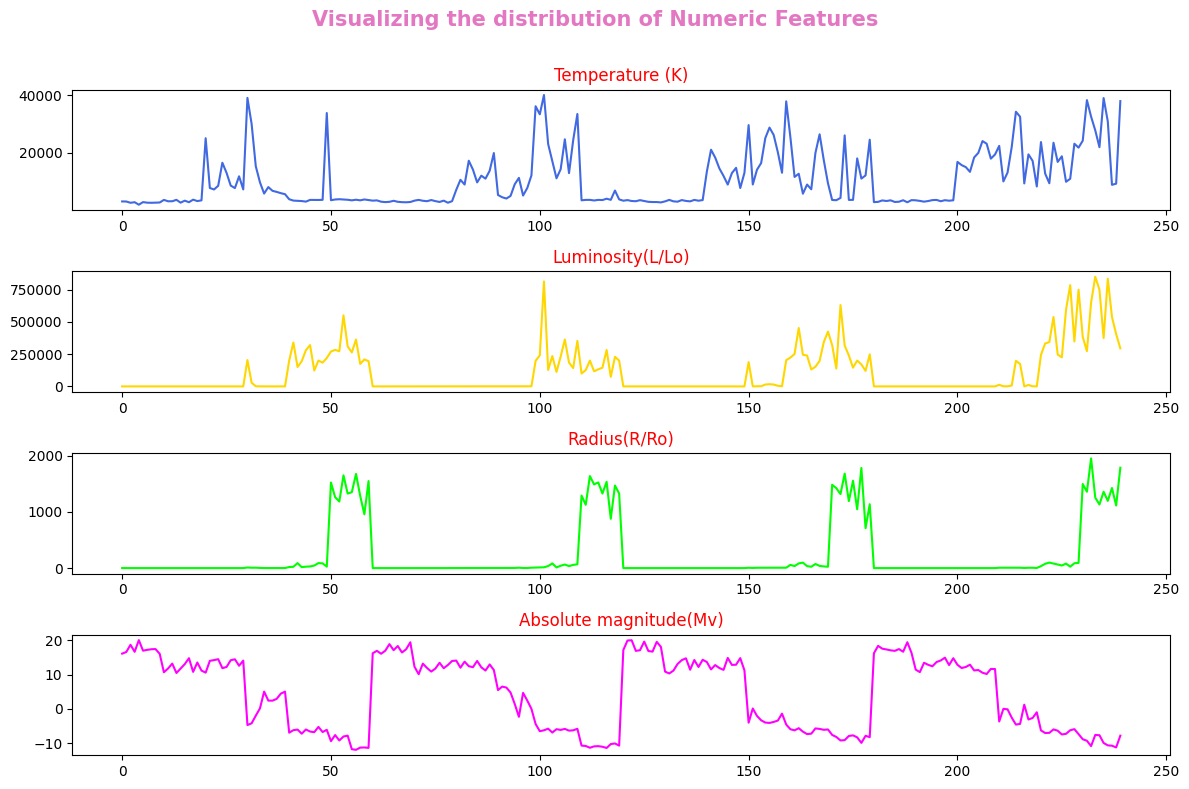

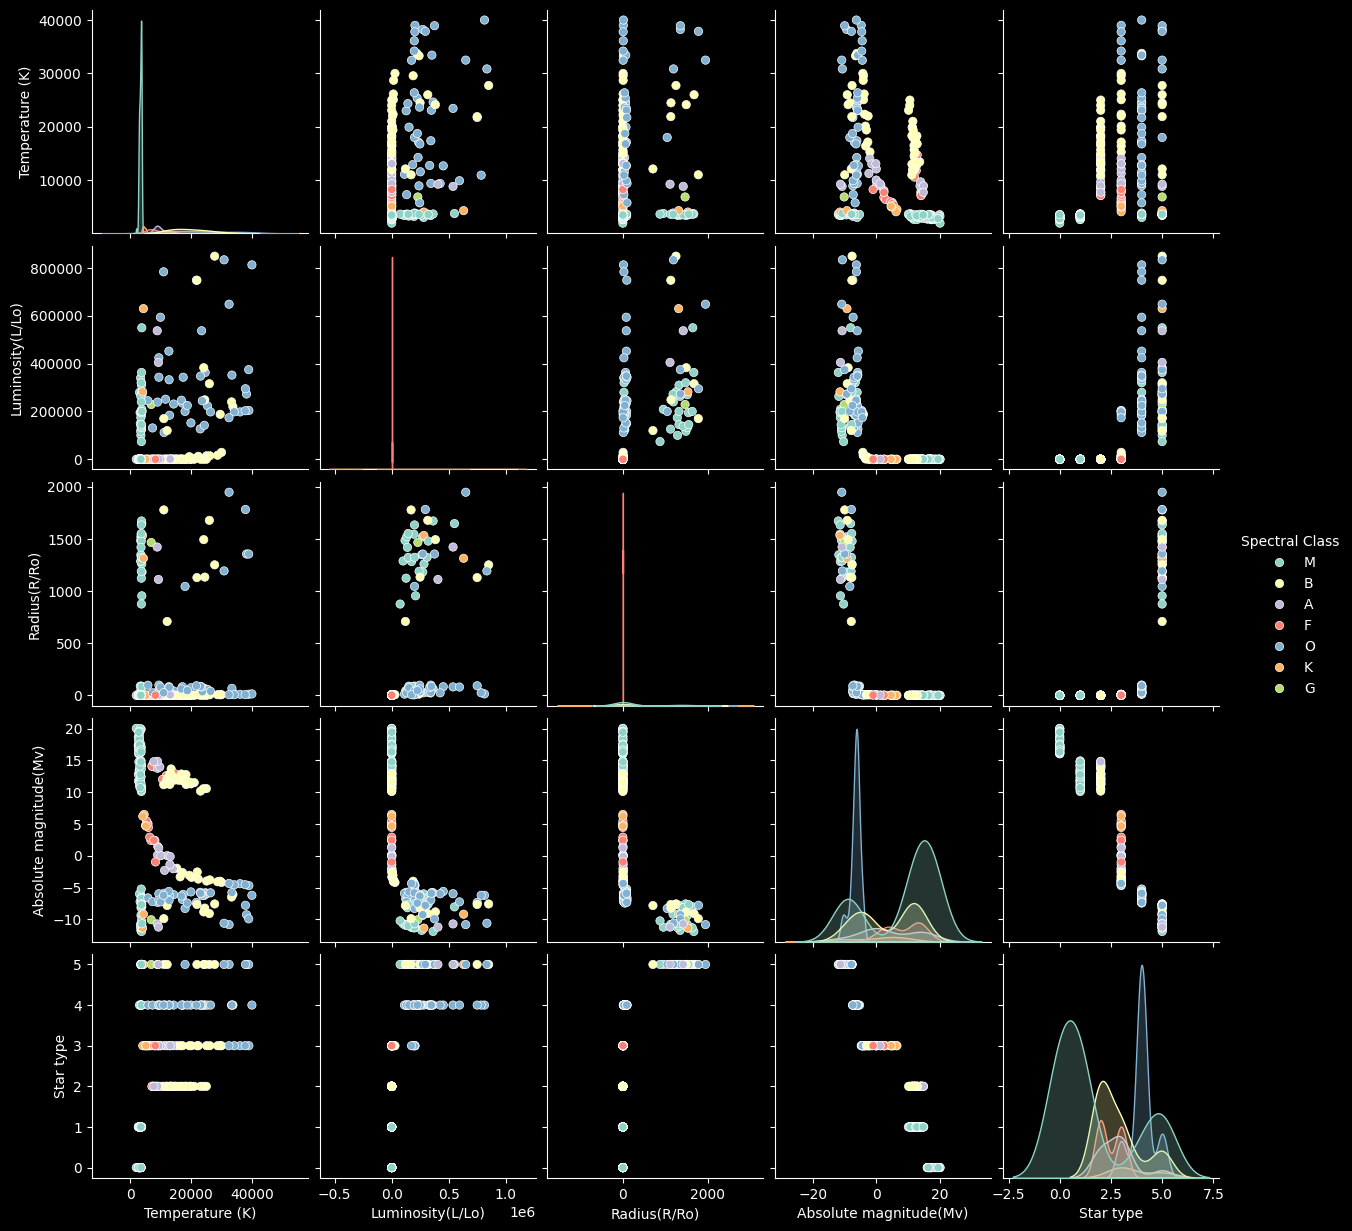

In [17]:
# Line Plots

# Colors to add in line plots
colors = ['royalblue', 'gold', 'lime', 'magenta']

# Add figure size and title to subplot
plt.figure(figsize=(12,8))
plt.suptitle('Visualizing the distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

# Use for loop and the function that creates subplot of line plots
for i in range(4):
  line_subplot(star_df, colors, i)

# Use tight_layout() to automatically adjust the spacing in subplot
plt.tight_layout()

# Save the figure
plt.savefig(base_dir+'line_subplot.png')
plt.show()

# Get a pairplot - scatter
plt.style.use('dark_background')
sns.pairplot(star_df, hue='Spectral Class')
plt.savefig(base_dir+'pairplot.png')
plt.show()

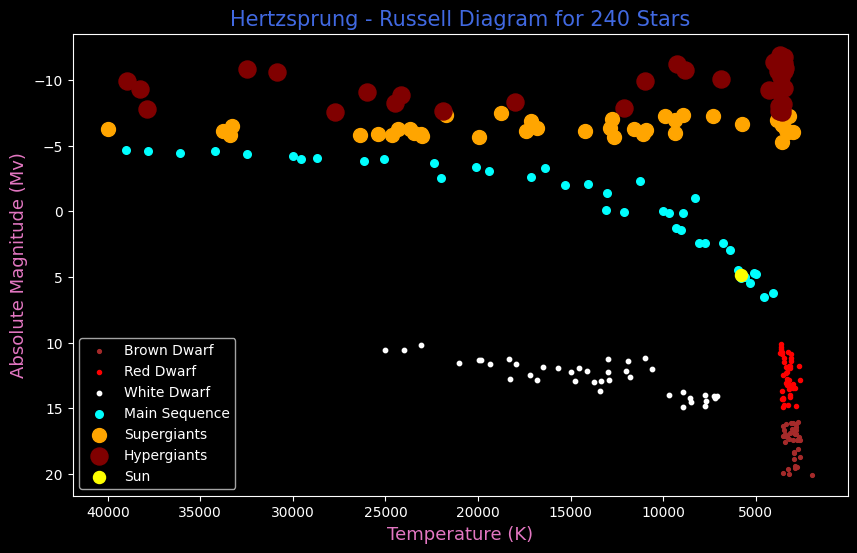

In [18]:
# Plotting a HR Diagram for Temp vs Abs mag
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}}

# Empty list and set to store ax and label of star_type
axes = []
labels = set()

plt.figure(figsize=(10, 6))

# For each and every star in the data
for i in range(len(star_type)):

  # Get its properties with its star_type from python dictonary
  properties = star_types[star_type[i]]

  # if label is not present in set labels
  if properties['label'] not in labels:
    # Then create the axis
    ax = plt.scatter(temperature[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])
    # Add it to axes list
    axes.append(ax)
    # Also add label to the labels set
    labels.add(properties['label'])
  # Else if the label already exist
  else:
    # Then don't save the axes nor add the label to labels set
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])

# Adding data for sun
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

# Add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')

# Add labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

# Visualize the labels only for the axes handles
plt.legend(handles=axes)

# Invert the axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.show()